# EDA

Case Study: Covid 19 Data Analysis

In [28]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Import the dataset

dataset = pd.read_csv("covid19_Confirmed_dataset.csv")
dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [30]:
dataset.shape

(266, 104)

In [31]:
# Delete the useless columns

df = dataset.drop(["Lat", "Long"], axis = 1, inplace = True)

In [32]:
dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [33]:
# Aggregating the rows by the country

corona_dataset_aggregated =  dataset.groupby("Country/Region").sum()

In [34]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [35]:
corona_dataset_aggregated.shape

(187, 100)

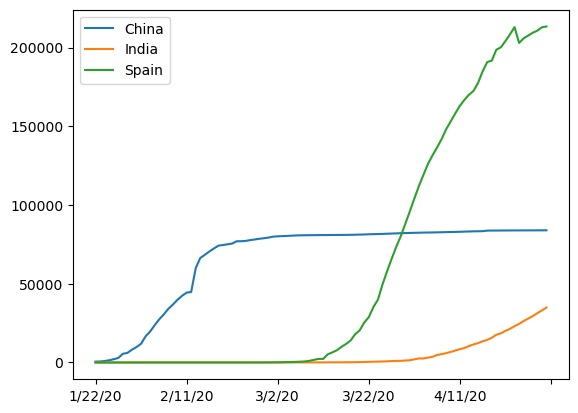

In [36]:
# Visualise data related to a country

corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["India"].plot()
corona_dataset_aggregated.loc["Spain"].plot()

plt.legend()

<AxesSubplot:>

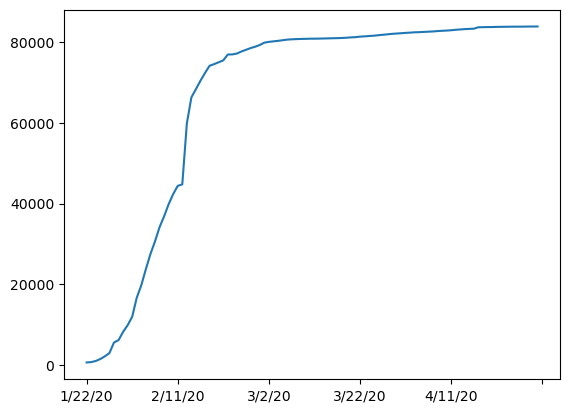

In [37]:
# Calculate a good measure

corona_dataset_aggregated.loc["China"].plot()

<AxesSubplot:>

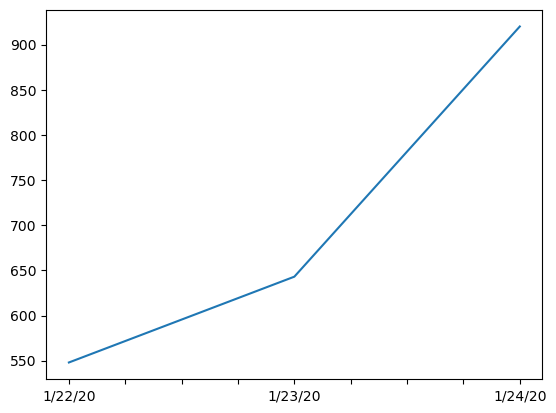

In [38]:
corona_dataset_aggregated.loc["China"][:3].plot()

<AxesSubplot:>

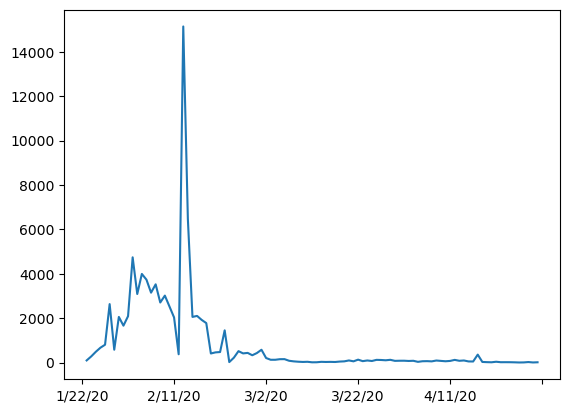

In [39]:
# Calculate the first derivative of the curve

corona_dataset_aggregated.loc["China"].diff().plot()

In [40]:
# Maximum infection rate

corona_dataset_aggregated.loc["China"].diff().max()

15136.0

In [41]:
corona_dataset_aggregated.loc["India"].diff().max()

1893.0

In [42]:
corona_dataset_aggregated.loc["Spain"].diff().max()

9630.0

In [43]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []

for c in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
    
corona_dataset_aggregated["Max_infection_rates"] = max_infection_rates

In [44]:
corona_dataset_aggregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


In [45]:
# Create a new data frame

corona_data = pd.DataFrame(corona_dataset_aggregated["Max_infection_rates"])

In [46]:
corona_data

,Max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [47]:
# Importing the dataset 2

happiness_report = pd.read_csv("worldwide_happiness_report.csv")

In [48]:
happiness_report

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [49]:
# Drop the useless columns

useless_cols = ["Overall rank", "Overall rank", "Generosity", "Perceptions of corruption"]

In [50]:
happiness_report.drop(useless_cols, axis=1, inplace = True)
happiness_report.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,7.769,1.340,1.587,0.986,0.596
1,Denmark,7.600,1.383,1.573,0.996,0.592
2,Norway,7.554,1.488,1.582,1.028,0.603
3,Iceland,7.494,1.380,1.624,1.026,0.591
4,Netherlands,7.488,1.396,1.522,0.999,0.557


In [62]:
happiness_report.set_index("Country or region", inplace = True)

In [64]:
happiness_report.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,,
Finland,7.769,1.340,1.587,0.986,0.596
Denmark,7.600,1.383,1.573,0.996,0.592
Norway,7.554,1.488,1.582,1.028,0.603
Iceland,7.494,1.380,1.624,1.026,0.591
Netherlands,7.488,1.396,1.522,0.999,0.557


In [65]:
# Join the dataset

corona_data.shape

(187, 1)

In [66]:
happiness_report.shape

(156, 5)

In [67]:
data = corona_data.join(happiness_report, how = "inner")
data

,Max_infection_rates,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,3.203,0.350,0.517,0.361,0.000
Albania,34.0,4.719,0.947,0.848,0.874,0.383
Algeria,199.0,5.211,1.002,1.160,0.785,0.086
Argentina,291.0,6.086,1.092,1.432,0.881,0.471
Armenia,134.0,4.559,0.850,1.055,0.815,0.283
...,...,...,...,...,...,...
Venezuela,29.0,4.707,0.960,1.427,0.805,0.154
Vietnam,19.0,5.175,0.741,1.346,0.851,0.543
Yemen,5.0,3.380,0.287,1.163,0.463,0.143
Zambia,9.0,4.107,0.578,1.058,0.426,0.431


In [68]:
data.corr()

,Max_infection_rates,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_infection_rates,1.000000,0.228783,0.250118,0.191958,0.289263,0.078196
Score,0.228783,1.000000,0.793847,0.788591,0.799893,0.587007
GDP per capita,0.250118,0.793847,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.788591,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.799893,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.587007,0.394603,0.456246,0.427892,1.000000


In [69]:
data

,Max_infection_rates,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,3.203,0.350,0.517,0.361,0.000
Albania,34.0,4.719,0.947,0.848,0.874,0.383
Algeria,199.0,5.211,1.002,1.160,0.785,0.086
Argentina,291.0,6.086,1.092,1.432,0.881,0.471
Armenia,134.0,4.559,0.850,1.055,0.815,0.283
...,...,...,...,...,...,...
Venezuela,29.0,4.707,0.960,1.427,0.805,0.154
Vietnam,19.0,5.175,0.741,1.346,0.851,0.543
Yemen,5.0,3.380,0.287,1.163,0.463,0.143
Zambia,9.0,4.107,0.578,1.058,0.426,0.431


C:\Users\Arpit Tiwari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Max_infection_rates'>

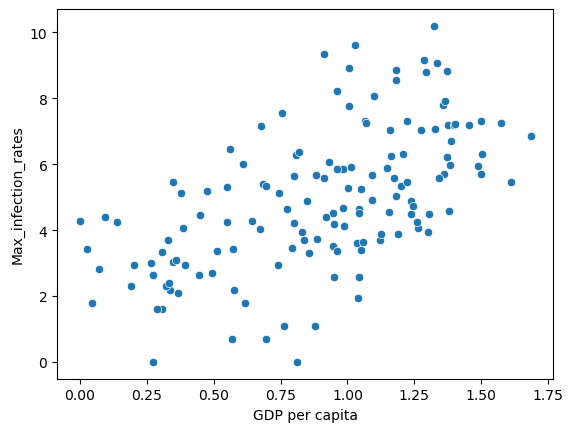

In [70]:
# Visualization

x = data["GDP per capita"]
y = data["Max_infection_rates"]
sns.scatterplot(x, np.log(y))    # Logscaling

C:\Users\Arpit Tiwari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Max_infection_rates'>

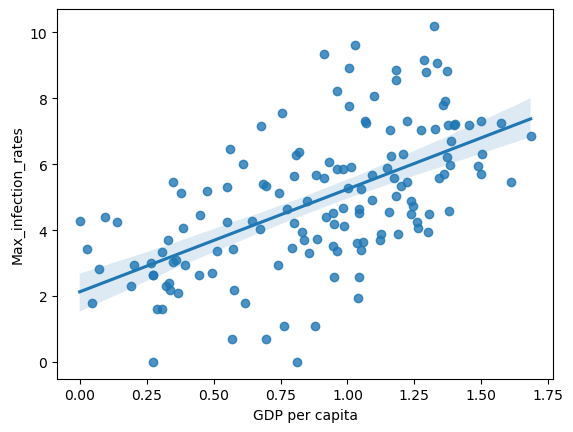

In [71]:
sns.regplot(x, np.log(y))

<AxesSubplot:xlabel='Social support', ylabel='Max_infection_rates'>

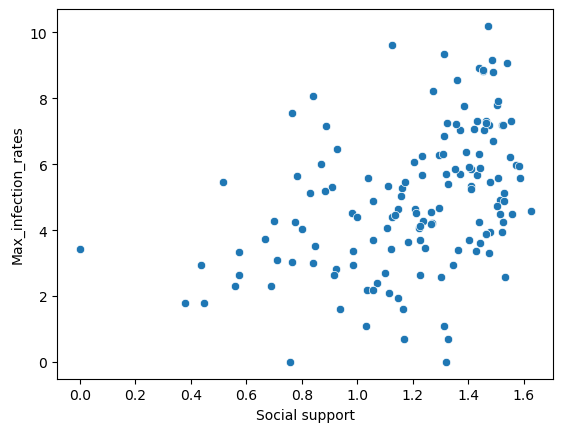

In [72]:
x = data["Social support"]
y = data["Max_infection_rates"]
sns.scatterplot(x, np.log(y))

C:\Users\Arpit Tiwari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='Max_infection_rates'>

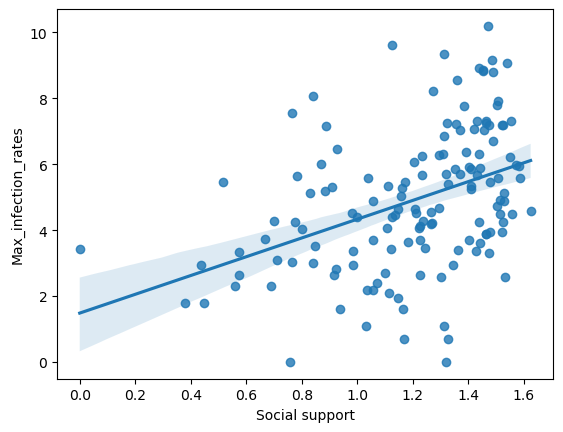

In [73]:
sns.regplot(x, np.log(y))

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Max_infection_rates'>

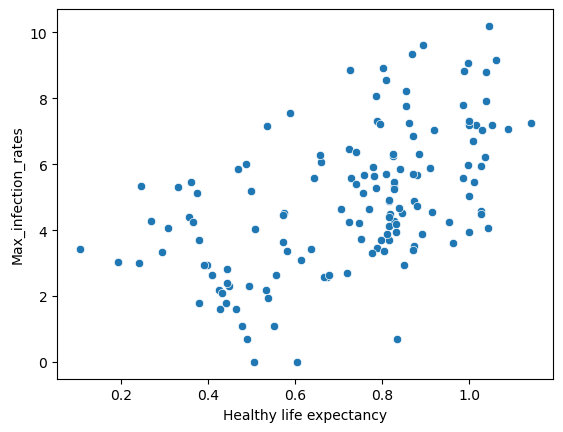

In [74]:
x = data["Healthy life expectancy"]
y = data["Max_infection_rates"]
sns.scatterplot(x, np.log(y))

C:\Users\Arpit Tiwari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Max_infection_rates'>

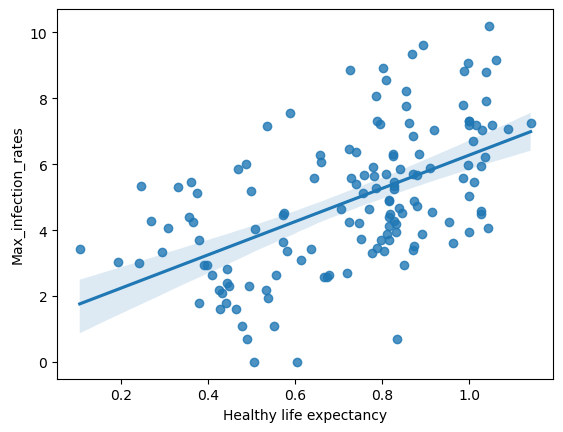

In [75]:
sns.regplot(x, np.log(y))

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Max_infection_rates'>

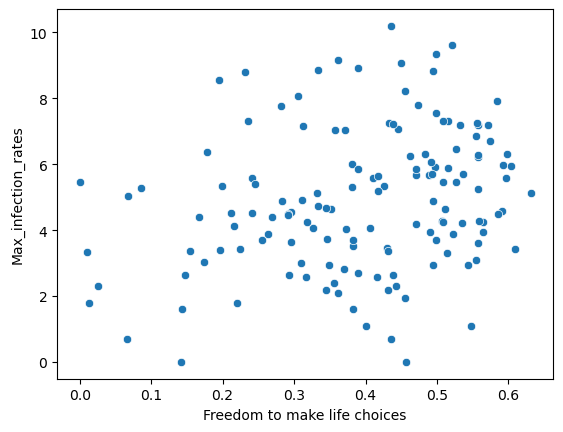

In [76]:
x = data["Freedom to make life choices"]
y = data["Max_infection_rates"]
sns.scatterplot(x, np.log(y))

C:\Users\Arpit Tiwari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Max_infection_rates'>

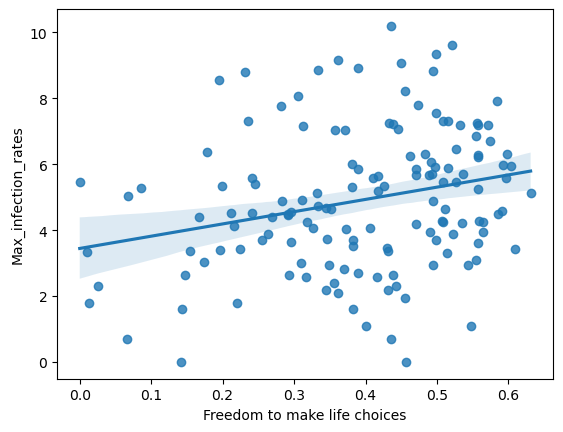

In [77]:
sns.regplot(x, np.log(y))